Linear Regression:
  MSE: 50677.97432302186
  R2 Score: 0.6309404528935819
  Accuracy (%): 63.09404528935819

Decision Tree:
  MSE: 14017.974279759848
  R2 Score: 0.8979148770615443
  Accuracy (%): 89.79148770615443

Random Forest:
  MSE: 4796.084843680892
  R2 Score: 0.9650727771988168
  Accuracy (%): 96.50727771988169

Support Vector Regression:
  MSE: 43642.53877392791
  R2 Score: 0.6821756234411442
  Accuracy (%): 68.21756234411443

The most accurate model is: Random Forest
Optimal Stopping Distance for the given input: 188.58473418828797 meters


c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


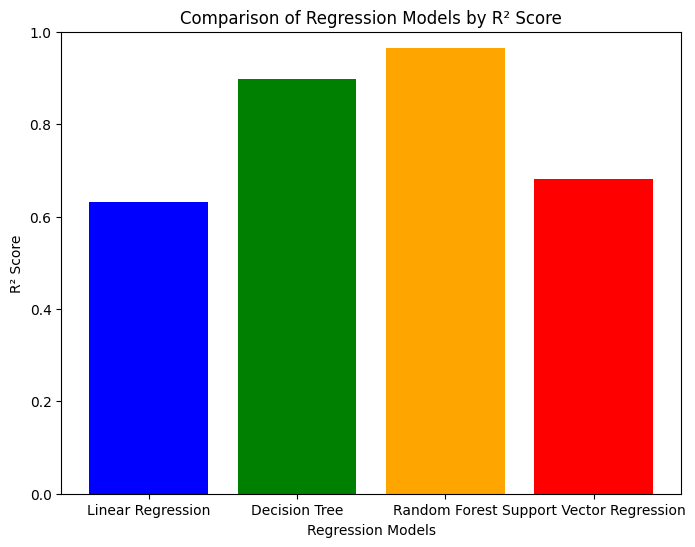

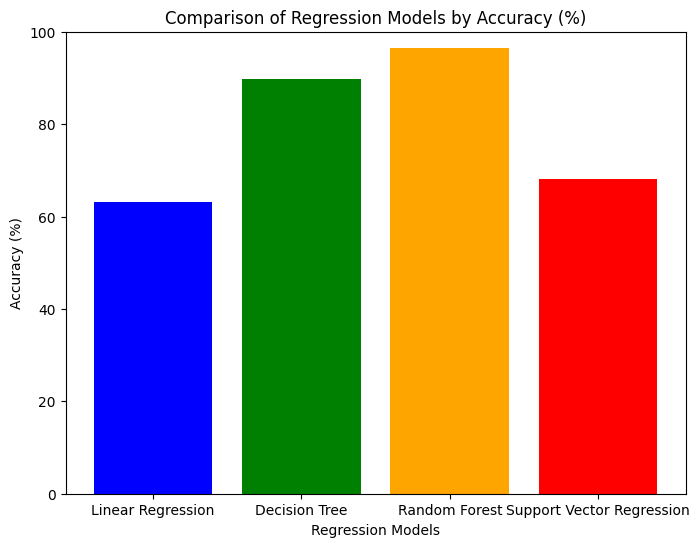

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('ABS_Stopping_Distance_Dataset.csv')

# Define features (X) and target (y)
X = data[['Road Friction', 'Vehicle Weight (kg)', 'Braking Force (N)', 'Wheel Radius (m)']]
y = data['Stopping Distance (m)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize features (X)
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize target (y)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_normalized, y_train_normalized.ravel())
    y_pred_normalized = model.predict(X_test_normalized)
    
    # Denormalize the predictions
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "Accuracy (%)": r2 * 100  # Convert R² Score to percentage
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2 Score']}")
    print(f"  Accuracy (%): {metrics['Accuracy (%)']}")
    print()

# Find the most accurate model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

print(f"The most accurate model is: {best_model_name}")

# Optimize the stopping distance using the best model
# Let's assume we want to find the optimal stopping distance for the following inputs:
input_data = np.array([[0.5, 1000, 2000, 0.5]])  # Example input: Road Friction = 0.5, Vehicle Weight = 1000 kg, Braking Force = 2000 N, Wheel Radius = 0.5 m

# Normalize the input data
input_data_normalized = scaler_X.transform(input_data)

# Predict the stopping distance (normalized)
optimal_stopping_distance_normalized = best_model.predict(input_data_normalized)

# Denormalize the prediction
optimal_stopping_distance = scaler_y.inverse_transform(optimal_stopping_distance_normalized.reshape(-1, 1))
print(f"Optimal Stopping Distance for the given input: {optimal_stopping_distance[0][0]} meters")

# Plotting the R² Scores of different models
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models by R² Score')
plt.ylim(0, 1)  # R² Score ranges from 0 to 1
plt.show()

# Plotting the Accuracy (%) of different models
accuracy_percent = [results[model]['Accuracy (%)'] for model in model_names]

# Plot Accuracy (%)
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_percent, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Models by Accuracy (%)')
plt.ylim(0, 100)  # Accuracy ranges from 0% to 100%
plt.show()

Linear Regression:
  MSE: 50677.97432302186
  R2 Score: 0.6309404528935819
  Accuracy (%): 63.09404528935819

Decision Tree:
  MSE: 14017.974279759848
  R2 Score: 0.8979148770615443
  Accuracy (%): 89.79148770615443

Random Forest:
  MSE: 4796.084843680892
  R2 Score: 0.9650727771988168
  Accuracy (%): 96.50727771988169

Support Vector Regression:
  MSE: 43642.53877392791
  R2 Score: 0.6821756234411442
  Accuracy (%): 68.21756234411443

The most accurate model is: Random Forest

Optimal Features for Minimum Stopping Distance:
  Road Friction: 0.6000
  Vehicle Weight (kg): 1250.0000
  Braking Force (N): 3000.0000
  Wheel Radius (m): 0.5500

Minimum Stopping Distance: 123.8186 meters


c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid

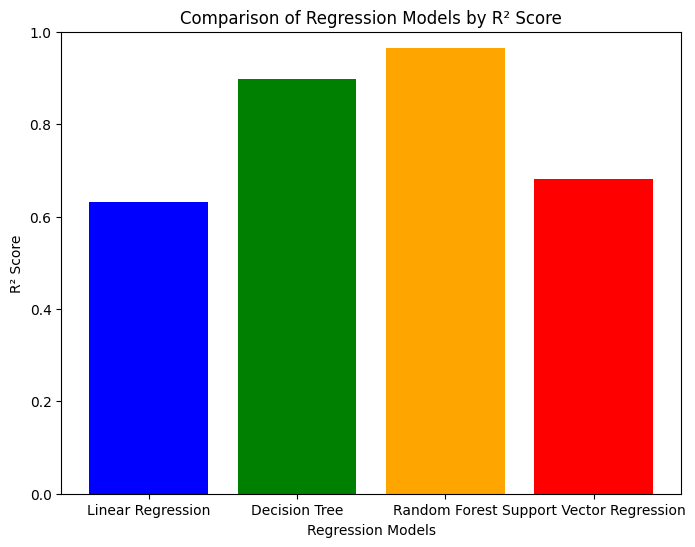

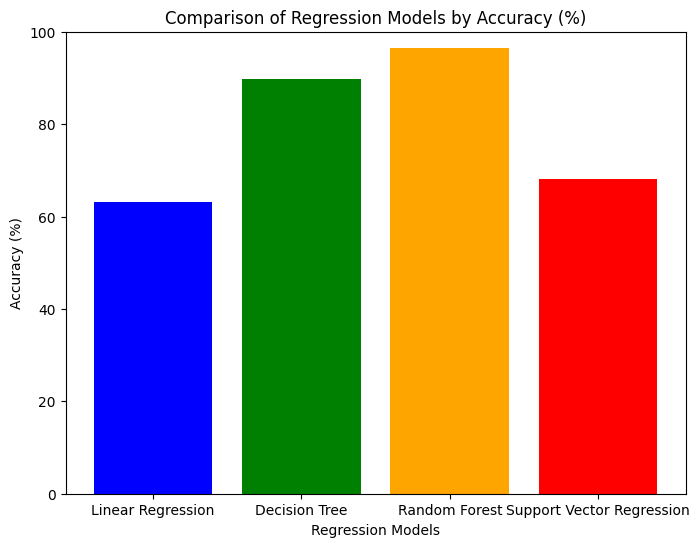

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

# Load the dataset
data = pd.read_csv('ABS_Stopping_Distance_Dataset.csv')

# Define features (X) and target (y)
X = data[['Road Friction', 'Vehicle Weight (kg)', 'Braking Force (N)', 'Wheel Radius (m)']]
y = data['Stopping Distance (m)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize features (X)
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize target (y)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_normalized, y_train_normalized.ravel())
    y_pred_normalized = model.predict(X_test_normalized)
    
    # Denormalize the predictions
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "Accuracy (%)": r2 * 100,  # Convert R² Score to percentage
        "Model": model
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2 Score']}")
    print(f"  Accuracy (%): {metrics['Accuracy (%)']}")
    print()

# Find the most accurate model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = results[best_model_name]['Model']

print(f"The most accurate model is: {best_model_name}")

# Define the objective function for optimization
def objective_function(features):
    """
    Objective function to minimize the stopping distance.
    Features are normalized before prediction and denormalized after prediction.
    """
    # Reshape features to match the input format
    features_normalized = scaler_X.transform(features.reshape(1, -1))
    
    # Predict the stopping distance (normalized)
    stopping_distance_normalized = best_model.predict(features_normalized)
    
    # Denormalize the prediction
    stopping_distance = scaler_y.inverse_transform(stopping_distance_normalized.reshape(-1, 1))
    
    return stopping_distance[0][0]

# Define bounds for the features (based on the dataset)
feature_bounds = [
    (X['Road Friction'].min(), X['Road Friction'].max()),          # Road Friction
    (X['Vehicle Weight (kg)'].min(), X['Vehicle Weight (kg)'].max()),  # Vehicle Weight
    (X['Braking Force (N)'].min(), X['Braking Force (N)'].max()),  # Braking Force
    (X['Wheel Radius (m)'].min(), X['Wheel Radius (m)'].max())     # Wheel Radius
]

# Initial guess (use the mean values of the features)
initial_guess = [
    X['Road Friction'].mean(),
    X['Vehicle Weight (kg)'].mean(),
    X['Braking Force (N)'].mean(),
    X['Wheel Radius (m)'].mean()
]

# Perform optimization to minimize the stopping distance
result = minimize(
    objective_function,
    initial_guess,
    bounds=feature_bounds,
    method='L-BFGS-B'  # Bounded optimization method
)

# Extract the optimal features
optimal_features = result.x
optimal_stopping_distance = result.fun

print("\nOptimal Features for Minimum Stopping Distance:")
print(f"  Road Friction: {optimal_features[0]:.4f}")
print(f"  Vehicle Weight (kg): {optimal_features[1]:.4f}")
print(f"  Braking Force (N): {optimal_features[2]:.4f}")
print(f"  Wheel Radius (m): {optimal_features[3]:.4f}")
print(f"\nMinimum Stopping Distance: {optimal_stopping_distance:.4f} meters")

# Plotting the R² Scores of different models
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models by R² Score')
plt.ylim(0, 1)  # R² Score ranges from 0 to 1
plt.show()

# Plotting the Accuracy (%) of different models
accuracy_percent = [results[model]['Accuracy (%)'] for model in model_names]

# Plot Accuracy (%)
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_percent, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Models by Accuracy (%)')
plt.ylim(0, 100)  # Accuracy ranges from 0% to 100%
plt.show()

Linear Regression:
  MSE: 50677.97432302186
  R2 Score: 0.6309404528935819
  Accuracy (%): 63.09404528935819

Decision Tree:
  MSE: 14017.974279759848
  R2 Score: 0.8979148770615443
  Accuracy (%): 89.79148770615443

Random Forest:
  MSE: 4796.084843680892
  R2 Score: 0.9650727771988168
  Accuracy (%): 96.50727771988169

Support Vector Regression:
  MSE: 43642.53877392791
  R2 Score: 0.6821756234411442
  Accuracy (%): 68.21756234411443

The most accurate model is: Random Forest

Optimal Features for Minimum Stopping Distance (Wheel Radius = 0.3m):
  Road Friction: 0.6000
  Vehicle Weight (kg): 1250.0000
  Braking Force (N): 3000.0000
  Wheel Radius (m): 0.3000 (fixed)

Minimum Stopping Distance: 215.2029 meters


c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


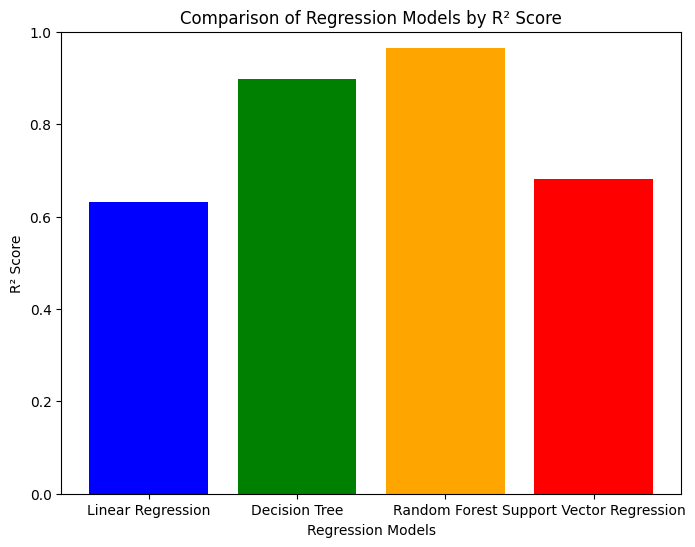

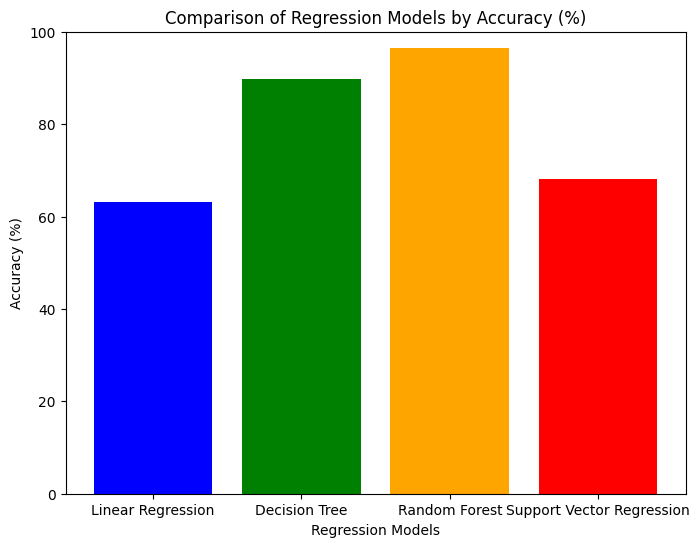

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

# Load the dataset
data = pd.read_csv('ABS_Stopping_Distance_Dataset.csv')

# Define features (X) and target (y)
X = data[['Road Friction', 'Vehicle Weight (kg)', 'Braking Force (N)', 'Wheel Radius (m)']]
y = data['Stopping Distance (m)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize features (X)
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize target (y)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_normalized, y_train_normalized.ravel())
    y_pred_normalized = model.predict(X_test_normalized)
    
    # Denormalize the predictions
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "Accuracy (%)": r2 * 100,  # Convert R² Score to percentage
        "Model": model
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2 Score']}")
    print(f"  Accuracy (%): {metrics['Accuracy (%)']}")
    print()

# Find the most accurate model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = results[best_model_name]['Model']

print(f"The most accurate model is: {best_model_name}")

# Define the objective function for optimization
def objective_function(features):
    """
    Objective function to minimize the stopping distance.
    Features are normalized before prediction and denormalized after prediction.
    """
    # Fix the wheel radius to 0.3 meters
    features = np.append(features, 0.3)  # Add wheel radius = 0.3
    
    # Reshape features to match the input format
    features_normalized = scaler_X.transform(features.reshape(1, -1))
    
    # Predict the stopping distance (normalized)
    stopping_distance_normalized = best_model.predict(features_normalized)
    
    # Denormalize the prediction
    stopping_distance = scaler_y.inverse_transform(stopping_distance_normalized.reshape(-1, 1))
    
    return stopping_distance[0][0]

# Define bounds for the features (based on the dataset)
feature_bounds = [
    (X['Road Friction'].min(), X['Road Friction'].max()),          # Road Friction
    (X['Vehicle Weight (kg)'].min(), X['Vehicle Weight (kg)'].max()),  # Vehicle Weight
    (X['Braking Force (N)'].min(), X['Braking Force (N)'].max())  # Braking Force
]

# Initial guess (use the mean values of the features)
initial_guess = [
    X['Road Friction'].mean(),
    X['Vehicle Weight (kg)'].mean(),
    X['Braking Force (N)'].mean()
]

# Perform optimization to minimize the stopping distance
result = minimize(
    objective_function,
    initial_guess,
    bounds=feature_bounds,
    method='L-BFGS-B'  # Bounded optimization method
)

# Extract the optimal features
optimal_features = result.x
optimal_stopping_distance = result.fun

print("\nOptimal Features for Minimum Stopping Distance (Wheel Radius = 0.3m):")
print(f"  Road Friction: {optimal_features[0]:.4f}")
print(f"  Vehicle Weight (kg): {optimal_features[1]:.4f}")
print(f"  Braking Force (N): {optimal_features[2]:.4f}")
print(f"  Wheel Radius (m): 0.3000 (fixed)")
print(f"\nMinimum Stopping Distance: {optimal_stopping_distance:.4f} meters")

# Plotting the R² Scores of different models
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models by R² Score')
plt.ylim(0, 1)  # R² Score ranges from 0 to 1
plt.show()

# Plotting the Accuracy (%) of different models
accuracy_percent = [results[model]['Accuracy (%)'] for model in model_names]

# Plot Accuracy (%)
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_percent, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Models by Accuracy (%)')
plt.ylim(0, 100)  # Accuracy ranges from 0% to 100%
plt.show()

Linear Regression:
  MSE: 50677.97432302186
  R2 Score: 0.6309404528935819
  Accuracy (%): 63.09404528935819

Decision Tree:
  MSE: 14017.974279759848
  R2 Score: 0.8979148770615443
  Accuracy (%): 89.79148770615443

Random Forest:
  MSE: 4796.084843680892
  R2 Score: 0.9650727771988168
  Accuracy (%): 96.50727771988169

Support Vector Regression:
  MSE: 43642.53877392791
  R2 Score: 0.6821756234411442
  Accuracy (%): 68.21756234411443

The most accurate model is: Random Forest

Optimal Features for Minimum Stopping Distance:
  Road Friction: 0.6000
  Vehicle Weight (kg): 1250.0000
  Braking Force (N): 10000.0000 (fixed)
  Wheel Radius (m): 0.5000 (fixed)

Minimum Stopping Distance: 79.3834 meters


c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


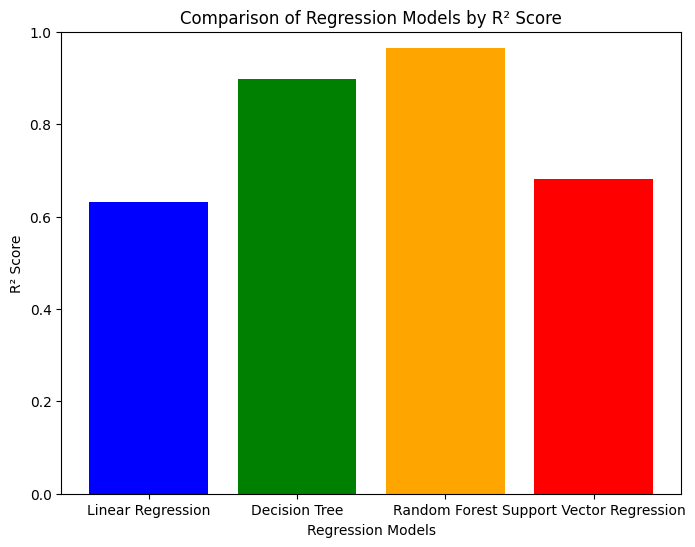

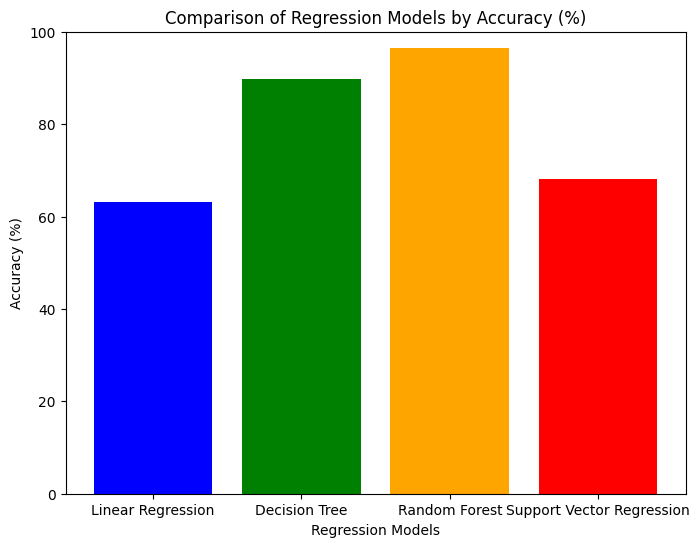

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

# Load the dataset
data = pd.read_csv('ABS_Stopping_Distance_Dataset.csv')

# Define features (X) and target (y)
X = data[['Road Friction', 'Vehicle Weight (kg)', 'Braking Force (N)', 'Wheel Radius (m)']]
y = data['Stopping Distance (m)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize features (X)
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize target (y)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_normalized, y_train_normalized.ravel())
    y_pred_normalized = model.predict(X_test_normalized)
    
    # Denormalize the predictions
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "Accuracy (%)": r2 * 100,  # Convert R² Score to percentage
        "Model": model
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2 Score']}")
    print(f"  Accuracy (%): {metrics['Accuracy (%)']}")
    print()

# Find the most accurate model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = results[best_model_name]['Model']

print(f"The most accurate model is: {best_model_name}")

# Define the objective function for optimization
def objective_function(features):
    """
    Objective function to minimize the stopping distance.
    Features are normalized before prediction and denormalized after prediction.
    """
    # Fix the wheel radius to 0.3 meters and set braking force in the range 8000-10000 N
    features = np.append(features, [10000, 0.5])  # Add braking force = 10000 N and wheel radius = 0.3 m
    
    # Reshape features to match the input format
    features_normalized = scaler_X.transform(features.reshape(1, -1))
    
    # Predict the stopping distance (normalized)
    stopping_distance_normalized = best_model.predict(features_normalized)
    
    # Denormalize the prediction
    stopping_distance = scaler_y.inverse_transform(stopping_distance_normalized.reshape(-1, 1))
    
    return stopping_distance[0][0]

# Define bounds for the features (based on the dataset)
feature_bounds = [
    (X['Road Friction'].min(), X['Road Friction'].max()),          # Road Friction
    (X['Vehicle Weight (kg)'].min(), X['Vehicle Weight (kg)'].max())  # Vehicle Weight
]

# Initial guess (use the mean values of the features)
initial_guess = [
    X['Road Friction'].mean(),
    X['Vehicle Weight (kg)'].mean()
]

# Perform optimization to minimize the stopping distance
result = minimize(
    objective_function,
    initial_guess,
    bounds=feature_bounds,
    method='L-BFGS-B'  # Bounded optimization method
)

# Extract the optimal features
optimal_features = result.x
optimal_stopping_distance = result.fun

print("\nOptimal Features for Minimum Stopping Distance:")
print(f"  Road Friction: {optimal_features[0]:.4f}")
print(f"  Vehicle Weight (kg): {optimal_features[1]:.4f}")
print(f"  Braking Force (N): 10000.0000 (fixed)")
print(f"  Wheel Radius (m): 0.5000 (fixed)")
print(f"\nMinimum Stopping Distance: {optimal_stopping_distance:.4f} meters")

# Plotting the R² Scores of different models
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models by R² Score')
plt.ylim(0, 1)  # R² Score ranges from 0 to 1
plt.show()

# Plotting the Accuracy (%) of different models
accuracy_percent = [results[model]['Accuracy (%)'] for model in model_names]

# Plot Accuracy (%)
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_percent, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Models by Accuracy (%)')
plt.ylim(0, 100)  # Accuracy ranges from 0% to 100%
plt.show()

Linear Regression:
  MSE: 50677.97432302186
  R2 Score: 0.6309404528935819
  Accuracy (%): 63.09404528935819

Decision Tree:
  MSE: 14017.974279759848
  R2 Score: 0.8979148770615443
  Accuracy (%): 89.79148770615443

Random Forest:
  MSE: 4796.084843680892
  R2 Score: 0.9650727771988168
  Accuracy (%): 96.50727771988169

Support Vector Regression:
  MSE: 43642.53877392791
  R2 Score: 0.6821756234411442
  Accuracy (%): 68.21756234411443

The most accurate model is: Random Forest

Optimal Features for Minimum Stopping Distance (Braking Force = 10000 N):
  Road Friction: 1.0000
  Vehicle Weight (kg): 1250.0000
  Braking Force (N): 10000.0000 (fixed)
  Wheel Radius (m): 0.5500

Minimum Stopping Distance: 50.2621 meters


c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\Urvesh Parmar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid

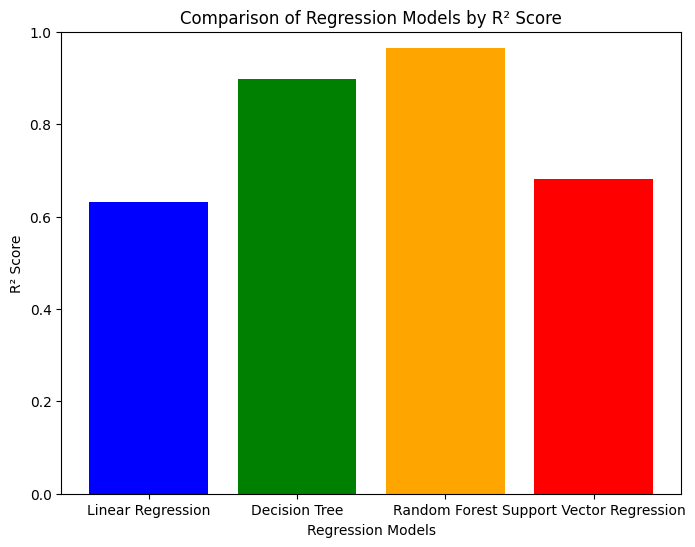

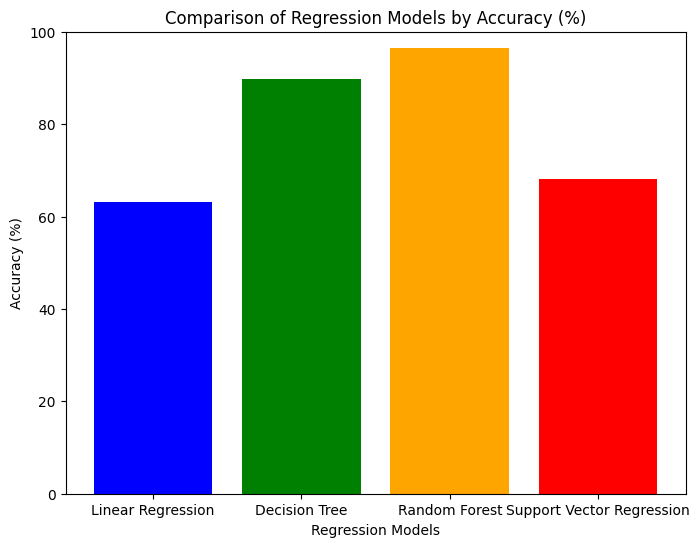

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

# Load the dataset
data = pd.read_csv('ABS_Stopping_Distance_Dataset.csv')

# Define features (X) and target (y)
X = data[['Road Friction', 'Vehicle Weight (kg)', 'Braking Force (N)', 'Wheel Radius (m)']]
y = data['Stopping Distance (m)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features and target using MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Normalize features (X)
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize target (y)
y_train_normalized = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_y.transform(y_test.values.reshape(-1, 1))

# Initialize regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_normalized, y_train_normalized.ravel())
    y_pred_normalized = model.predict(X_test_normalized)
    
    # Denormalize the predictions
    y_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1))
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MSE": mse,
        "R2 Score": r2,
        "Accuracy (%)": r2 * 100,  # Convert R² Score to percentage
        "Model": model
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2 Score: {metrics['R2 Score']}")
    print(f"  Accuracy (%): {metrics['Accuracy (%)']}")
    print()

# Find the most accurate model
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = results[best_model_name]['Model']

print(f"The most accurate model is: {best_model_name}")

# Define the objective function for optimization
def objective_function(features):
    """
    Objective function to minimize the stopping distance.
    Features are normalized before prediction and denormalized after prediction.
    """
    # Add the fixed braking force (10000 N) to the features
    features = np.insert(features, 2, 10000)  # Insert braking force = 10000 N at index 2
    
    # Reshape features to match the input format
    features_normalized = scaler_X.transform(features.reshape(1, -1))
    
    # Predict the stopping distance (normalized)
    stopping_distance_normalized = best_model.predict(features_normalized)
    
    # Denormalize the prediction
    stopping_distance = scaler_y.inverse_transform(stopping_distance_normalized.reshape(-1, 1))
    
    # Add a penalty term to increase bias towards road friction
    road_friction_weight = 10.0  # Weight for road friction
    penalty = road_friction_weight * (1 - features[0])  # Penalize low road friction
    
    return stopping_distance[0][0] + penalty

# Define bounds for the features (based on the dataset)
feature_bounds = [
    (X['Road Friction'].min(), X['Road Friction'].max()),          # Road Friction
    (X['Vehicle Weight (kg)'].min(), X['Vehicle Weight (kg)'].max()),  # Vehicle Weight
    (X['Wheel Radius (m)'].min(), X['Wheel Radius (m)'].max())     # Wheel Radius
]

# Initial guess (use the mean values of the features)
initial_guess = [
    X['Road Friction'].mean(),
    X['Vehicle Weight (kg)'].mean(),
    X['Wheel Radius (m)'].mean()
]

# Perform optimization to minimize the stopping distance
result = minimize(
    objective_function,
    initial_guess,
    bounds=feature_bounds,
    method='L-BFGS-B'  # Bounded optimization method
)

# Extract the optimal features
optimal_features = result.x
optimal_stopping_distance = result.fun

print("\nOptimal Features for Minimum Stopping Distance (Braking Force = 10000 N):")
print(f"  Road Friction: {optimal_features[0]:.4f}")
print(f"  Vehicle Weight (kg): {optimal_features[1]:.4f}")
print(f"  Braking Force (N): 10000.0000 (fixed)")
print(f"  Wheel Radius (m): {optimal_features[2]:.4f}")
print(f"\nMinimum Stopping Distance: {optimal_stopping_distance:.4f} meters")

# Plotting the R² Scores of different models
model_names = list(results.keys())
r2_scores = [results[model]['R2 Score'] for model in model_names]

# Plot R² Scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R² Score')
plt.title('Comparison of Regression Models by R² Score')
plt.ylim(0, 1)  # R² Score ranges from 0 to 1
plt.show()

# Plotting the Accuracy (%) of different models
accuracy_percent = [results[model]['Accuracy (%)'] for model in model_names]

# Plot Accuracy (%)
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_percent, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Regression Models by Accuracy (%)')
plt.ylim(0, 100)  # Accuracy ranges from 0% to 100%
plt.show()